# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# Helper functions 

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()


In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Exemplo 6.2 - Escalas e Unidades de Medida

## Tabela 6.2

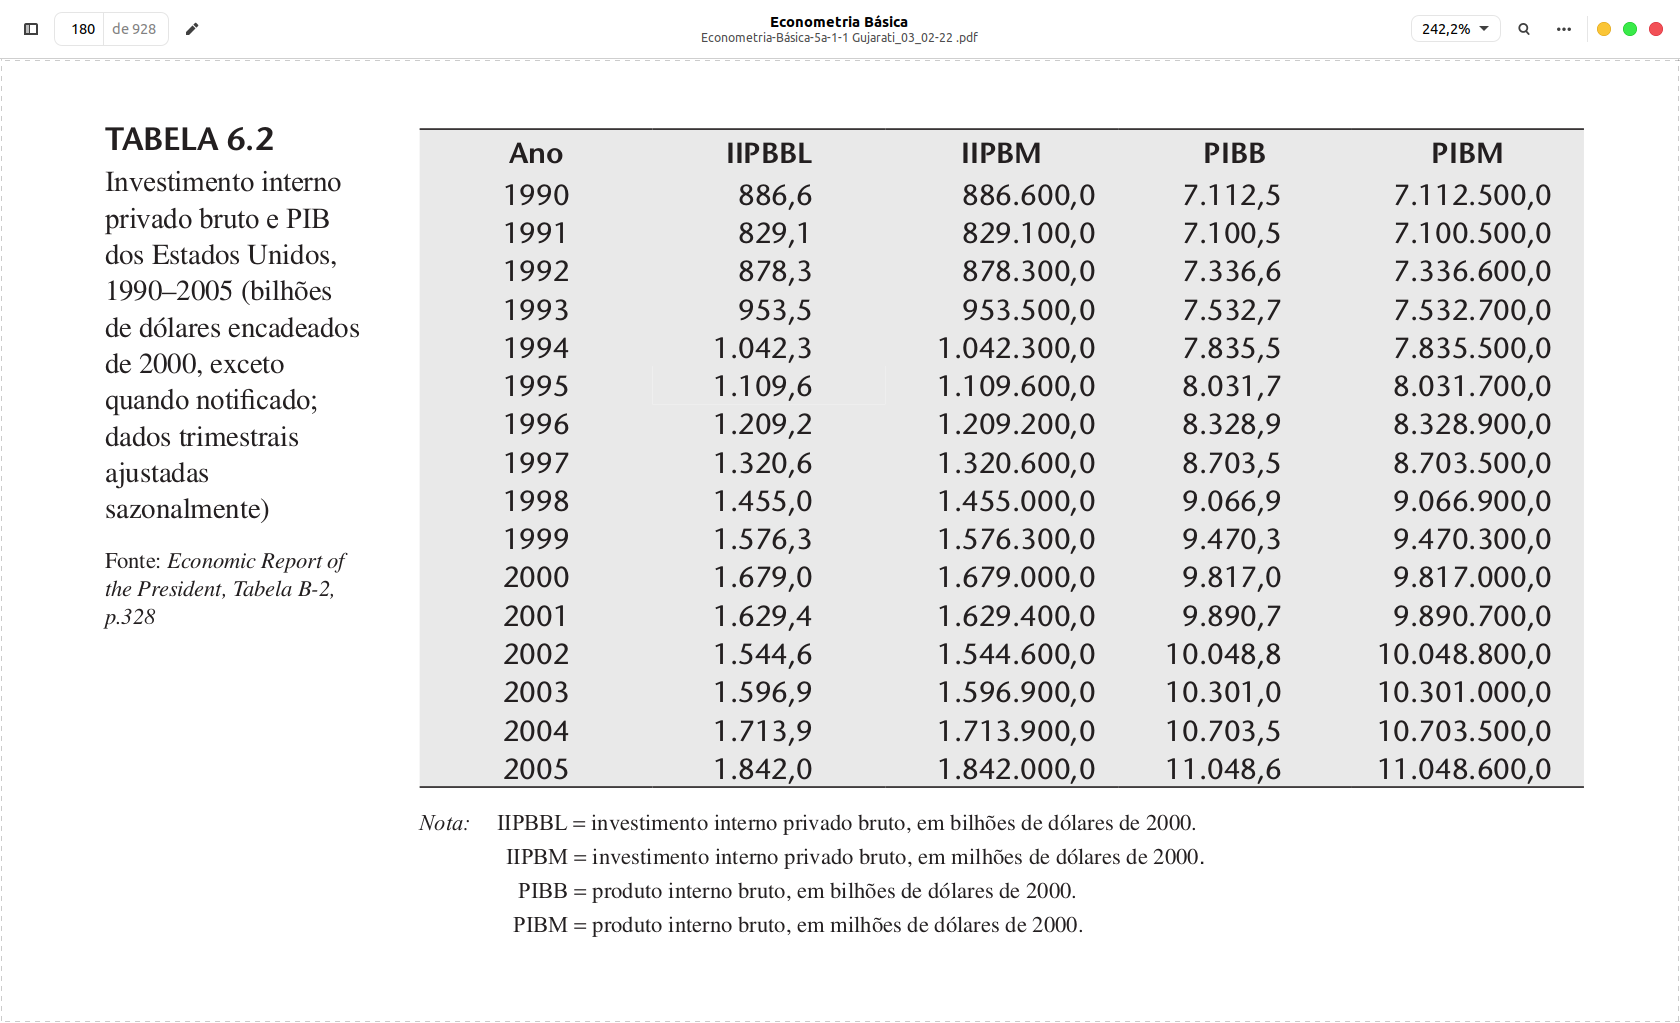

In [5]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/Tabela_6.2.png')

In [6]:
data = pd.read_excel("/home/deivison/Documentos/projetos/econometria/datasets/cap06_TAB_6.2.xlsx")
data = pd.DataFrame(data)
data

,Ano,IIPBBL,IIPBM,PIBB,PIBM
0,1990,886.6,886600,7112.5,7112500
1,1991,829.1,829100,7100.5,7100500
2,1992,878.3,878300,7336.6,7336600
3,1993,953.5,953500,7532.7,7532700
4,1994,1042.3,1042300,7835.5,7835500
5,1995,1109.6,1109600,8031.7,8031700
6,1996,1209.2,1209200,8328.9,8328900
7,1997,1320.6,1320600,8703.5,8703500
8,1998,1455.0,1455000,9066.9,9066900
9,1999,1576.3,1576300,9470.3,9470300


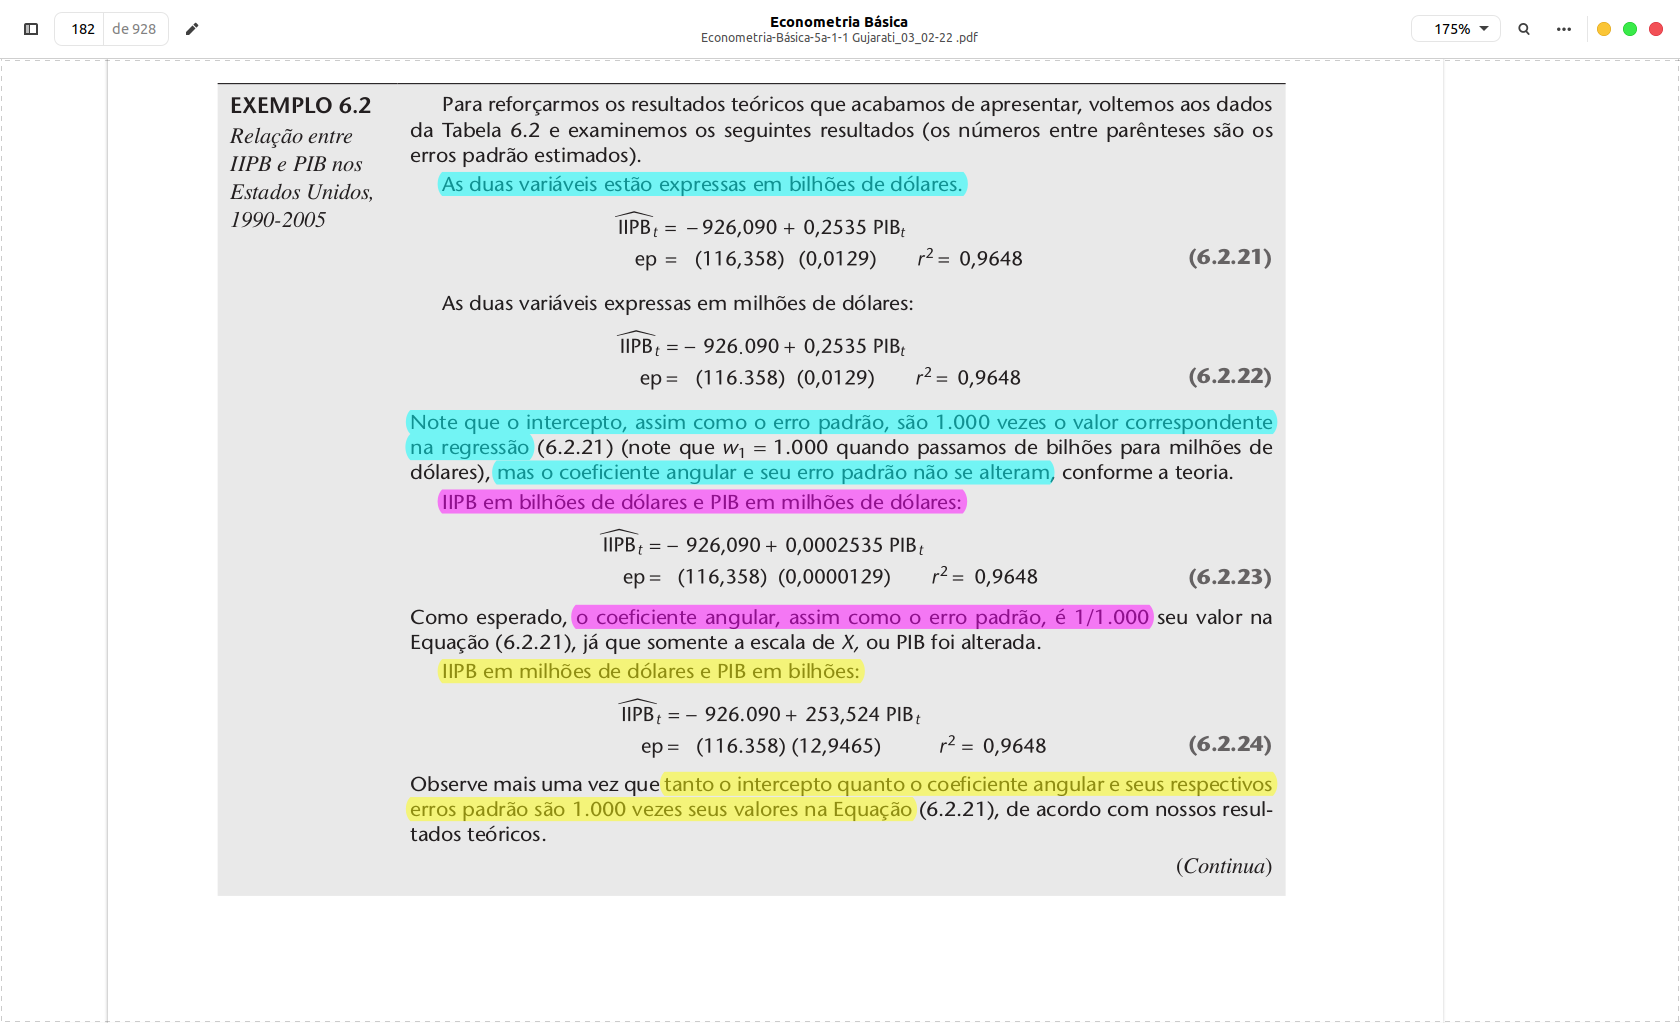

In [7]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.2.png')

## Gráficos Bilhões-Bilhões x Milhões-Milhões 
Investimento Interno (y) x PIB (x)

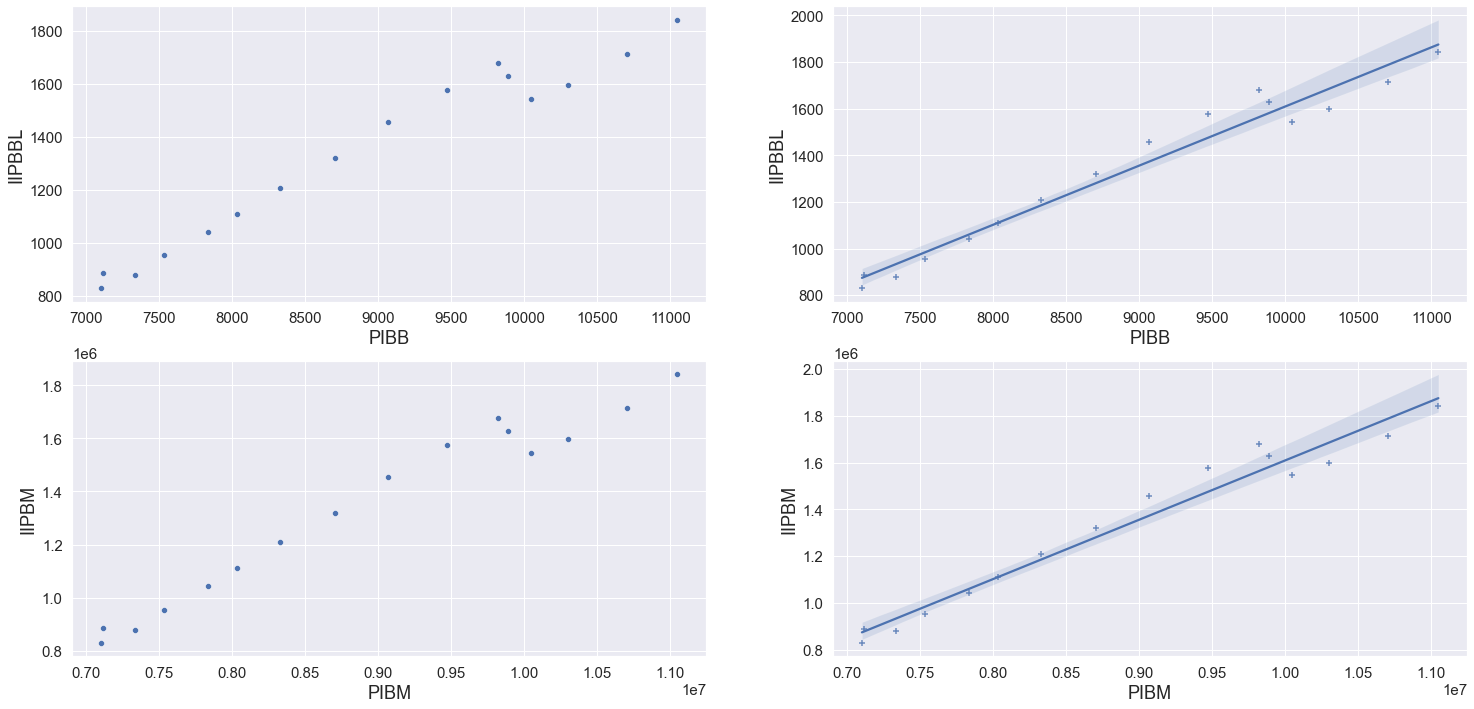

In [8]:
fig = plt.figure( figsize = (25,25))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

#bilhoes
sns.scatterplot( x = 'PIBB', y = 'IIPBBL', data = data, ax = ax1);

sns.regplot( x = 'PIBB', y = 'IIPBBL', data = data, fit_reg = True, marker = '+', ax = ax2);

#milhoes
sns.scatterplot( x = 'PIBM', y = 'IIPBM', data = data, ax = ax3);

sns.regplot( x = 'PIBM', y = 'IIPBM', data = data, fit_reg = True, marker = '+', ax = ax4);

## Coeficientes e Interceptos

In [9]:
#Regressão Bilhoes - Bilhoes
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

print("\nRegressão Bilhoes - Bilhoes")
print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

#Regressão Milhoes - Milhoes
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)
print("\n\nRegressão Milhões - Milhoes")
print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )


Regressão Bilhoes - Bilhoes
Coeficiente:     [0.25352403]
Intercepto: [-926.09039499]
R2: 0.9647771617374283
R2 ajustado: 0.9622612447186732


Regressão Milhões - Milhoes
Coeficiente:     [0.25352403]
Intercepto: [-926090.39499226]
R2: 0.9647771617374283
R2 ajustado: 0.9622612447186732


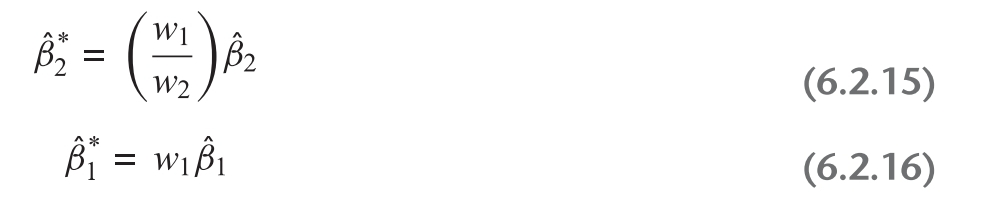

In [10]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/fator_escala.jpg')

In [11]:
# Fatores de escala

# Regressão bilhoes
# w1_beta1 = 1
# w2_beta2 = 1
# y = -926.0903 + 0.2535 x

# Regressão Milhões
# w1_beta1 = 1000
# w2_beta2 = 1000
# y = -926090.39 + 0.2535 x

## Erros padrões

In [12]:
#Regressão Bilhoes - Bilhoes
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print('Regressão Bilhões - Bilhões\n')
print(print_model)

Regressão Bilhões - Bilhões

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.43e-11
Time:                        08:45:07   Log-Likelihood:                -88.772
No. Observations:                  16   AIC:                             181.5
Df Residuals:                      14   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -926.0904  

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
#Regressão Milhoes - Milhoes
import statsmodels.api as sm
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print('Regressão Milhões - Milhões\n')
print(print_model)

Regressão Milhões - Milhões

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.43e-11
Time:                        08:45:07   Log-Likelihood:                -199.30
No. Observations:                  16   AIC:                             402.6
Df Residuals:                      14   BIC:                             404.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.261e+05  

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# Fatores de escala

# Regressão bilhoes
# w1_beta1 = 1
# w2_beta2 = 1
# y = -926.0903 + 0.2535 x
# std err = 116.358

# Regressão Milhões
# w1_beta1 = 1000
# w2_beta2 = 1000
# y = -926090.39 + 0.2535 x
# std err = 116358.000

## Investimento Interno Bilhões (y) x PIB Milhões (x)

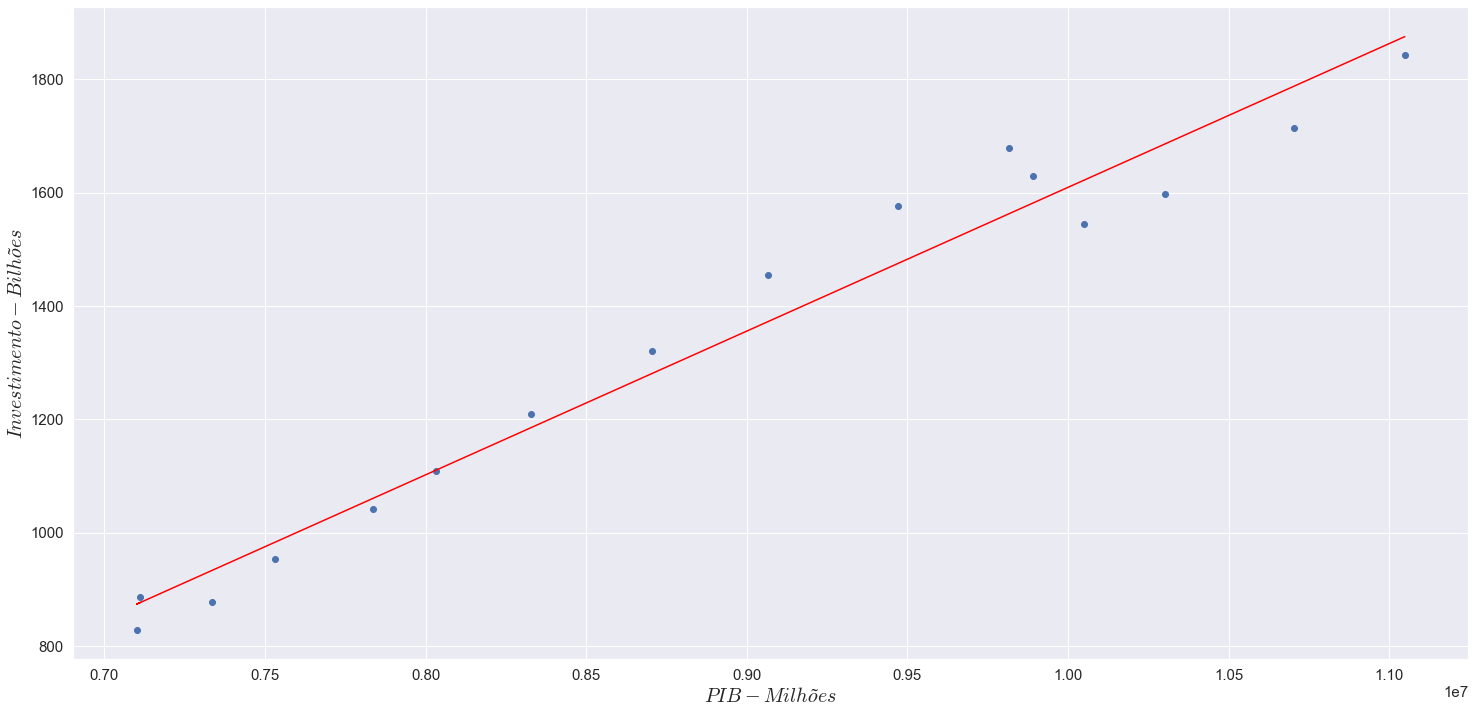

Coeficiente:     [0.00025352]
Intercepto: [-926.09039499]
R2: 0.9647771617374283
R2 ajustado: 0.9622612447186732


In [15]:
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PIB-Milhões$', fontsize = 20 )
plt.ylabel(r'$Investimento-Bilhões$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [16]:
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.43e-11
Time:                        08:45:08   Log-Likelihood:                -88.772
No. Observations:                  16   AIC:                             181.5
Df Residuals:                      14   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -926.0904    116.358     -7.959      0.0

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
# Fatores de escala

# Regressão y(bilhoes) - x(bilhoes)
# w1_beta1 = 1
# w2_beta2 = 1
# y = -926.0903 + 0.2535 x

# Regressão y(bilhoes) - x(Milhoes)
# w1_beta1 = 1
# w2_beta2 = 1000
# y = -926.0904 + 0.2535/1000 x

## Investimento Interno Milhões (y) x PIB Bilhões (x)

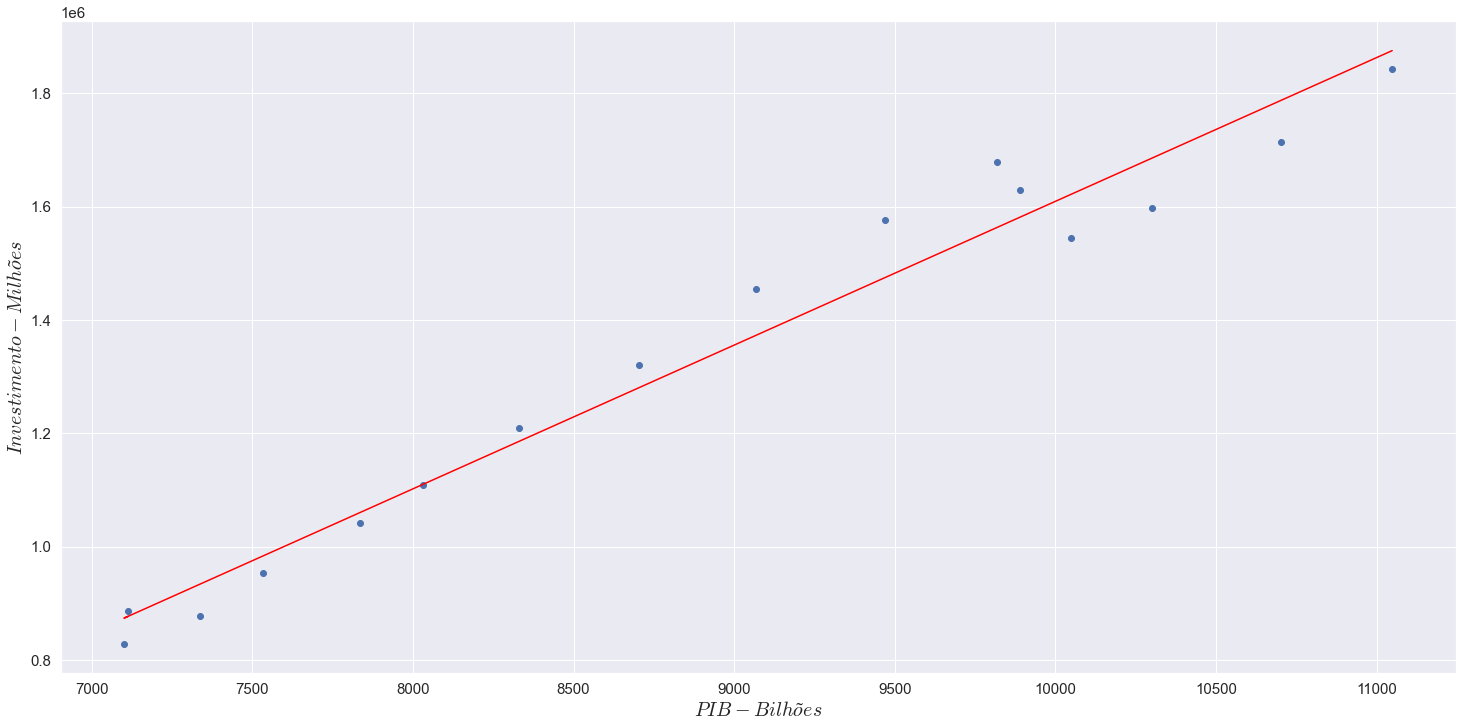

Coeficiente:     [253.524035]
Intercepto: [-926090.39499226]
R2: 0.9647771617374283
R2 ajustado: 0.9622612447186732


In [19]:
#Scikit Learn
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PIB - Bilhões$', fontsize = 20 )
plt.ylabel(r'$Investimento-Milhões$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [ ]:
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

In [21]:
# Fatores de escala

# Regressão y(bilhoes) - x(bilhoes)
# w1_beta1 = 1
# w2_beta2 = 1
# y = -926.0903 + 0.2535 x

# Regressão y(milhoes) - x(bilhoes)
# w1_beta1 = 1000
# w2_beta2 = 1
# y = -926.0904*1000 + 0.2535*1000 x

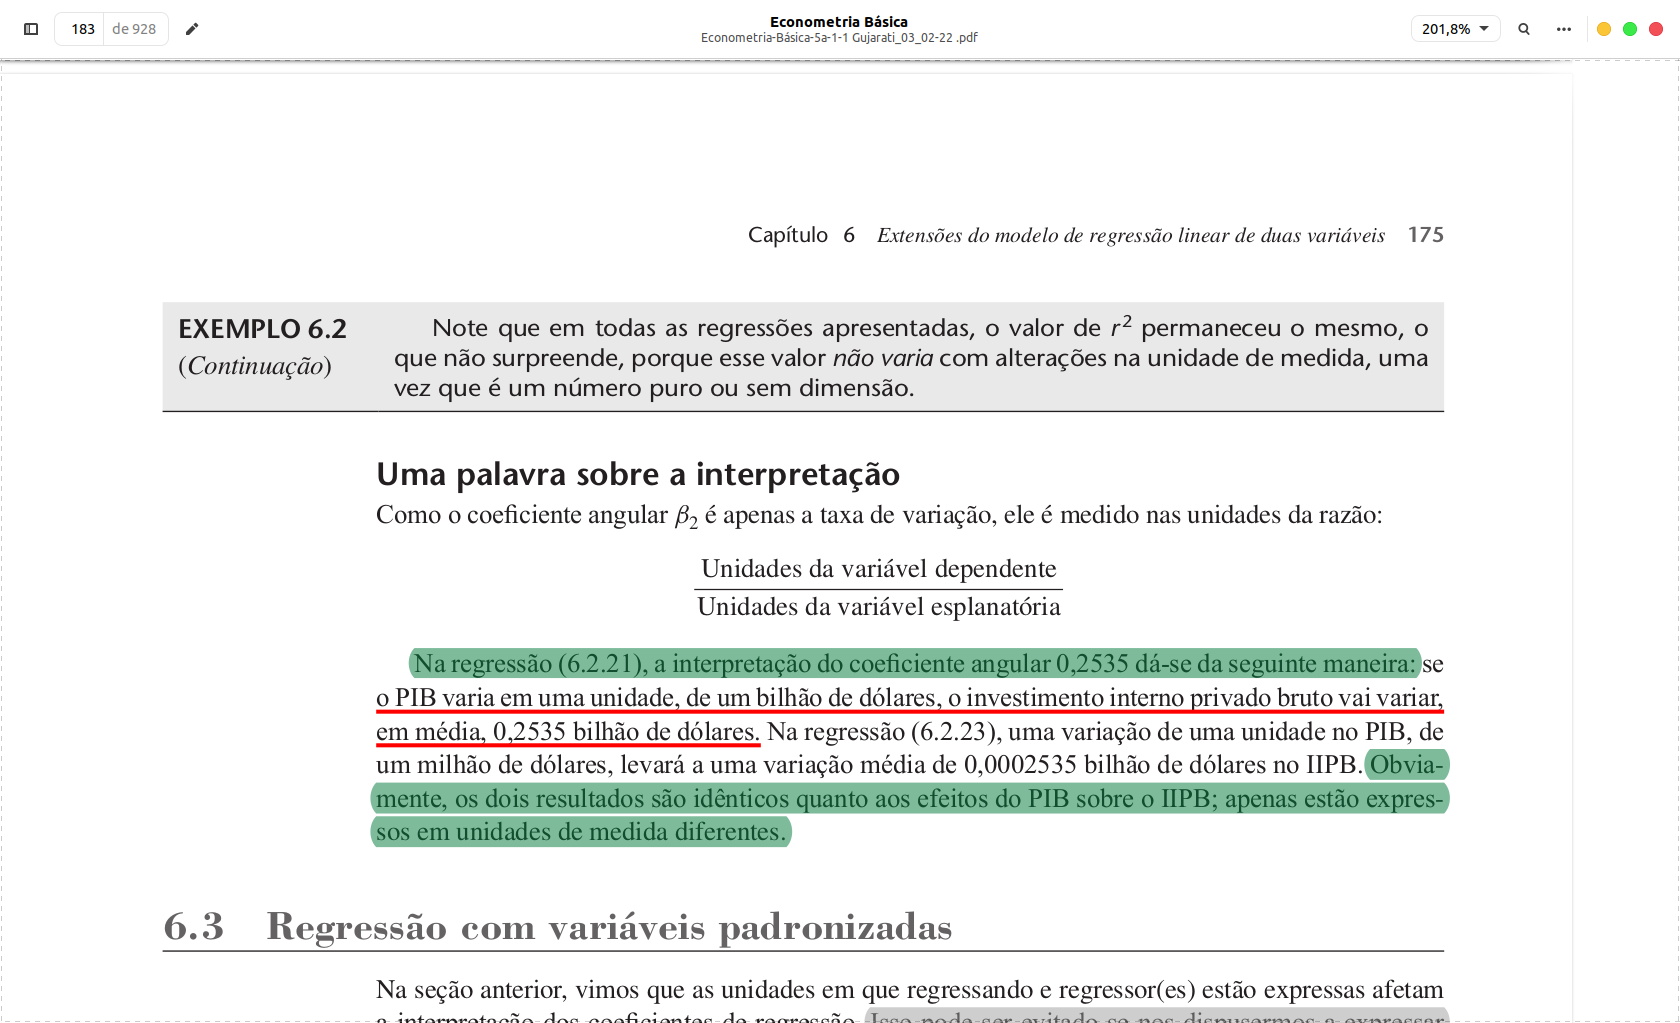

In [22]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.2_2.png')

In [23]:
#Investimento Interno depende do PIB
# #Bilhoes
# pib Bilhoes = 0.2535 x Investimento bilhoes

# #milhoes
# PIB Milhoes = 0.0002535 x Investimento Bilhoes

#  2. As unidades e a escala em que expressamos o regressando e o(s) regressor(es) são muito importantes, porque a interpretação dos coeficientes de regressão depende fundamentalmente deles. 
#     Na prática, o pesquisador deve não só citar as fontes dos dados, mas também mostrar explicitamente como as variáveis são medidas.

# Regressão com variáveis padronizadas

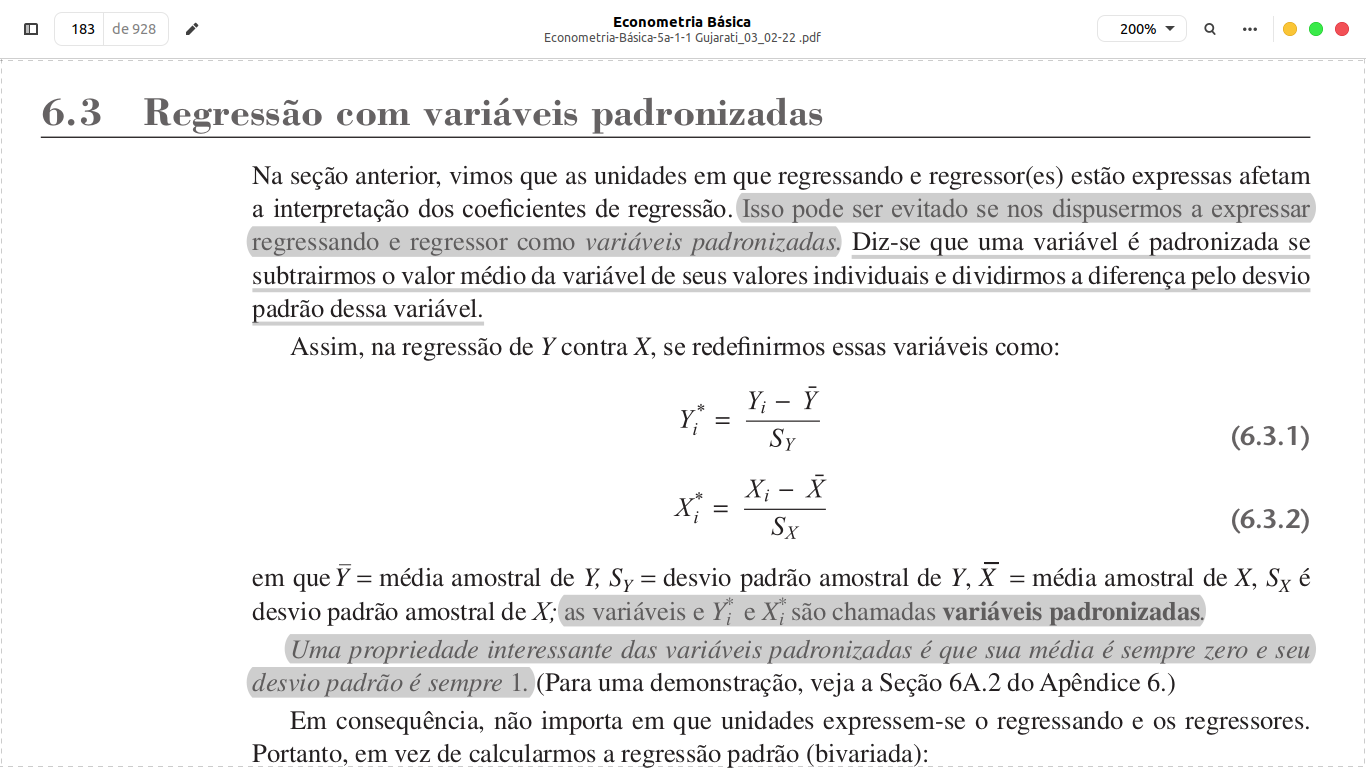

In [24]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_padronizacao_1.png')

In [25]:
data = pd.read_excel("/home/deivison/Documentos/projetos/econometria/datasets/cap06_TAB_6.2.xlsx")
data = pd.DataFrame(data)
data

,Ano,IIPBBL,IIPBM,PIBB,PIBM
0,1990,886.6,886600,7112.5,7112500
1,1991,829.1,829100,7100.5,7100500
2,1992,878.3,878300,7336.6,7336600
3,1993,953.5,953500,7532.7,7532700
4,1994,1042.3,1042300,7835.5,7835500
5,1995,1109.6,1109600,8031.7,8031700
6,1996,1209.2,1209200,8328.9,8328900
7,1997,1320.6,1320600,8703.5,8703500
8,1998,1455.0,1455000,9066.9,9066900
9,1999,1576.3,1576300,9470.3,9470300


In [26]:
mean_y = np.mean(data['IIPBBL'] )
std_y = np.std(data['IIPBBL'] )
data['IIPBBL'] = data['IIPBBL'].apply( lambda x: (x - mean_y) / std_y )

mean_x = np.mean(data['PIBB'] )
std_x = np.std(data['PIBB'] )
data['PIBB'] = data['PIBB'].apply( lambda x: (x - mean_x) / std_x )
print(std_x)
print(std_y)
data

1282.715626594974
331.08234053017316


,Ano,IIPBBL,IIPBM,PIBB,PIBM
0,1990,-1.336658,886600,-1.390054,7112500
1,1991,-1.510330,829100,-1.399409,7100500
2,1992,-1.361727,878300,-1.215346,7336600
3,1993,-1.134593,953500,-1.062468,7532700
4,1994,-0.866382,1042300,-0.826406,7835500
5,1995,-0.663109,1109600,-0.673449,8031700
6,1996,-0.362278,1209200,-0.441753,8328900
7,1997,-0.025806,1320600,-0.149717,8703500
8,1998,0.380136,1455000,0.133589,9066900
9,1999,0.746510,1576300,0.448078,9470300


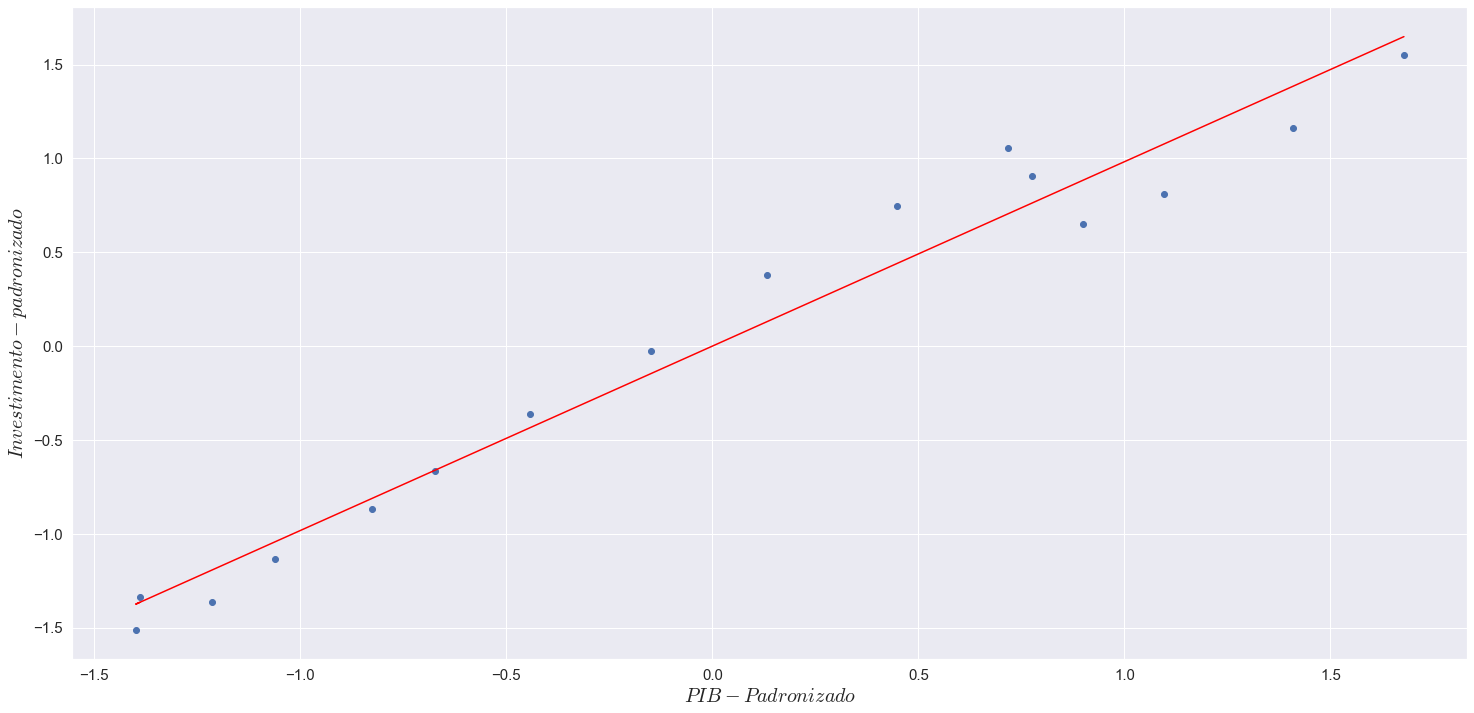


Regressão Bilhoes - Bilhoes
Coeficiente:     [0.98223071]
Intercepto: [1.64120456e-17]
R2: 0.9647771617374284
R2 ajustado: 0.9622612447186734


In [27]:
#Regressão Bilhoes - Bilhoes
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PIB - Padronizado$', fontsize = 20 )
plt.ylabel(r'$Investimento-padronizado$', fontsize = 20 )
plt.show();

print("\nRegressão Bilhoes - Bilhoes")
print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [28]:
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.43e-11
Time:                        08:45:10   Log-Likelihood:                 4.0655
No. Observations:                  16   AIC:                            -4.131
Df Residuals:                      14   BIC:                            -2.586
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -6.8e-16      0.050  -1.36e-14      1.0

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


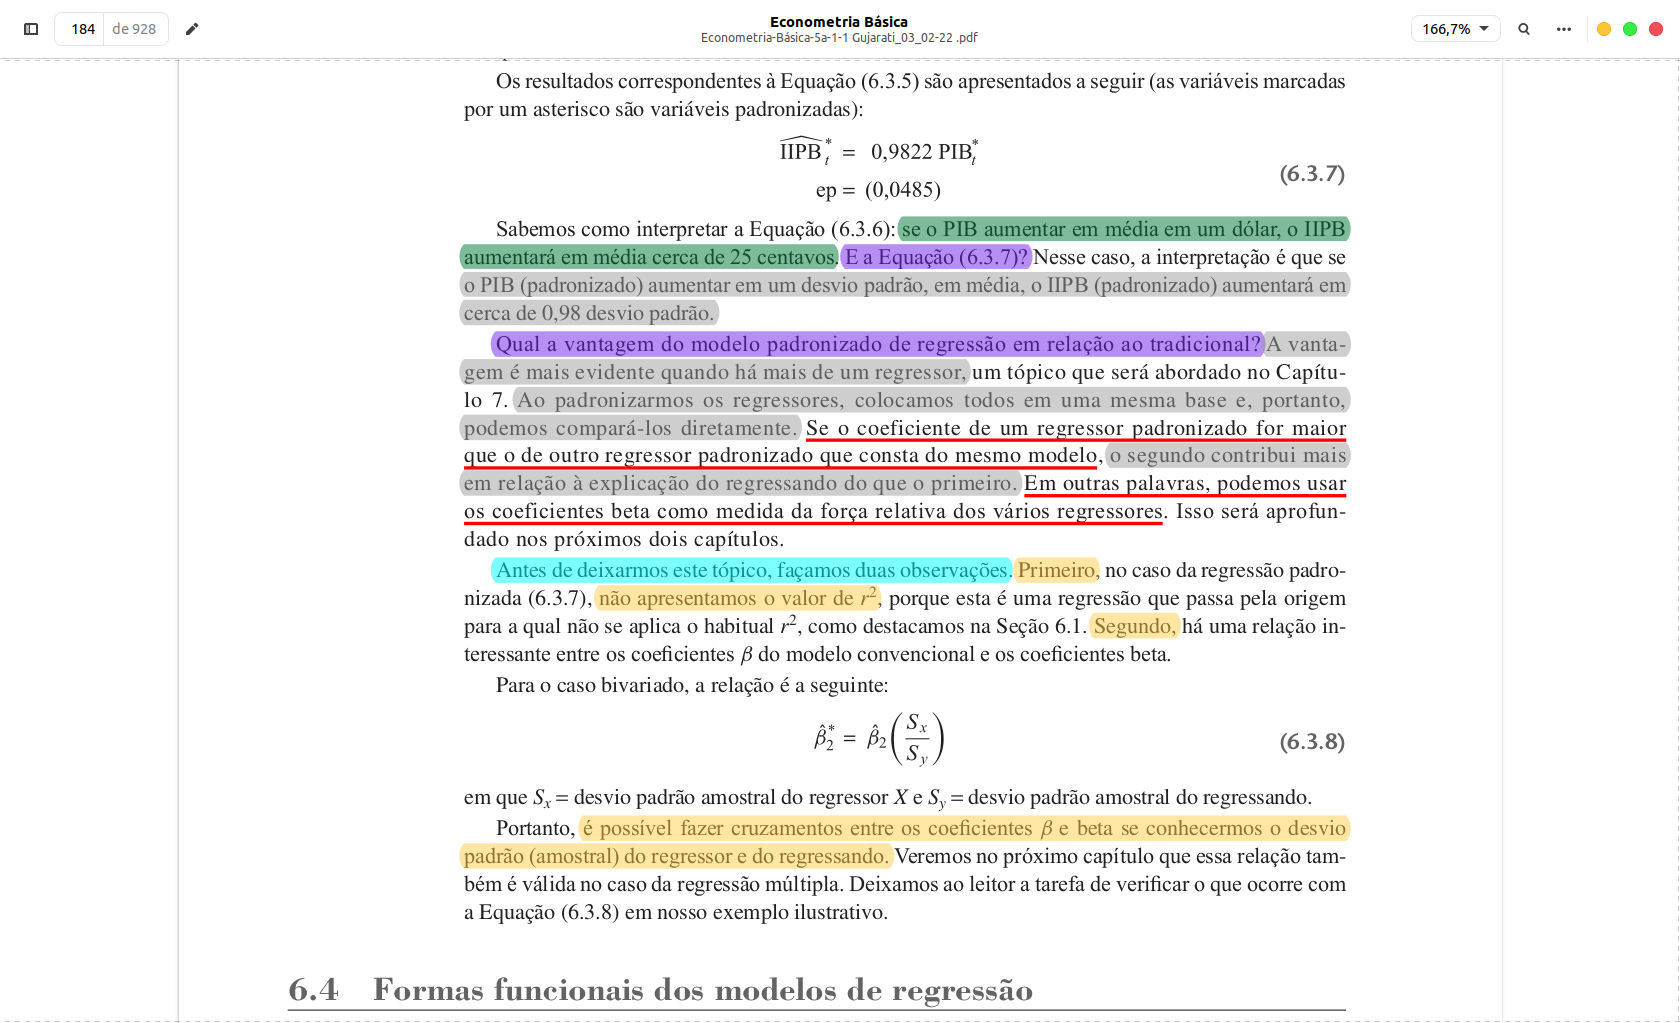

In [29]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_padronizacao_2.png')

In [30]:
#Regressão padronizada

# y (std) = 0,9822 PIB (std)



# Fatores de escala

# Regressão y(bilhoes) - x(bilhoes)
# w1_beta1 = 1
# w2_beta2 = 1
# y = -926.0903 + 0.2535 x

In [31]:
beta_std = 0.2535*(std_x/std_y)
beta_std

0.9821375879520574

# Exemplo 6.3 Modelo LOG-LOG

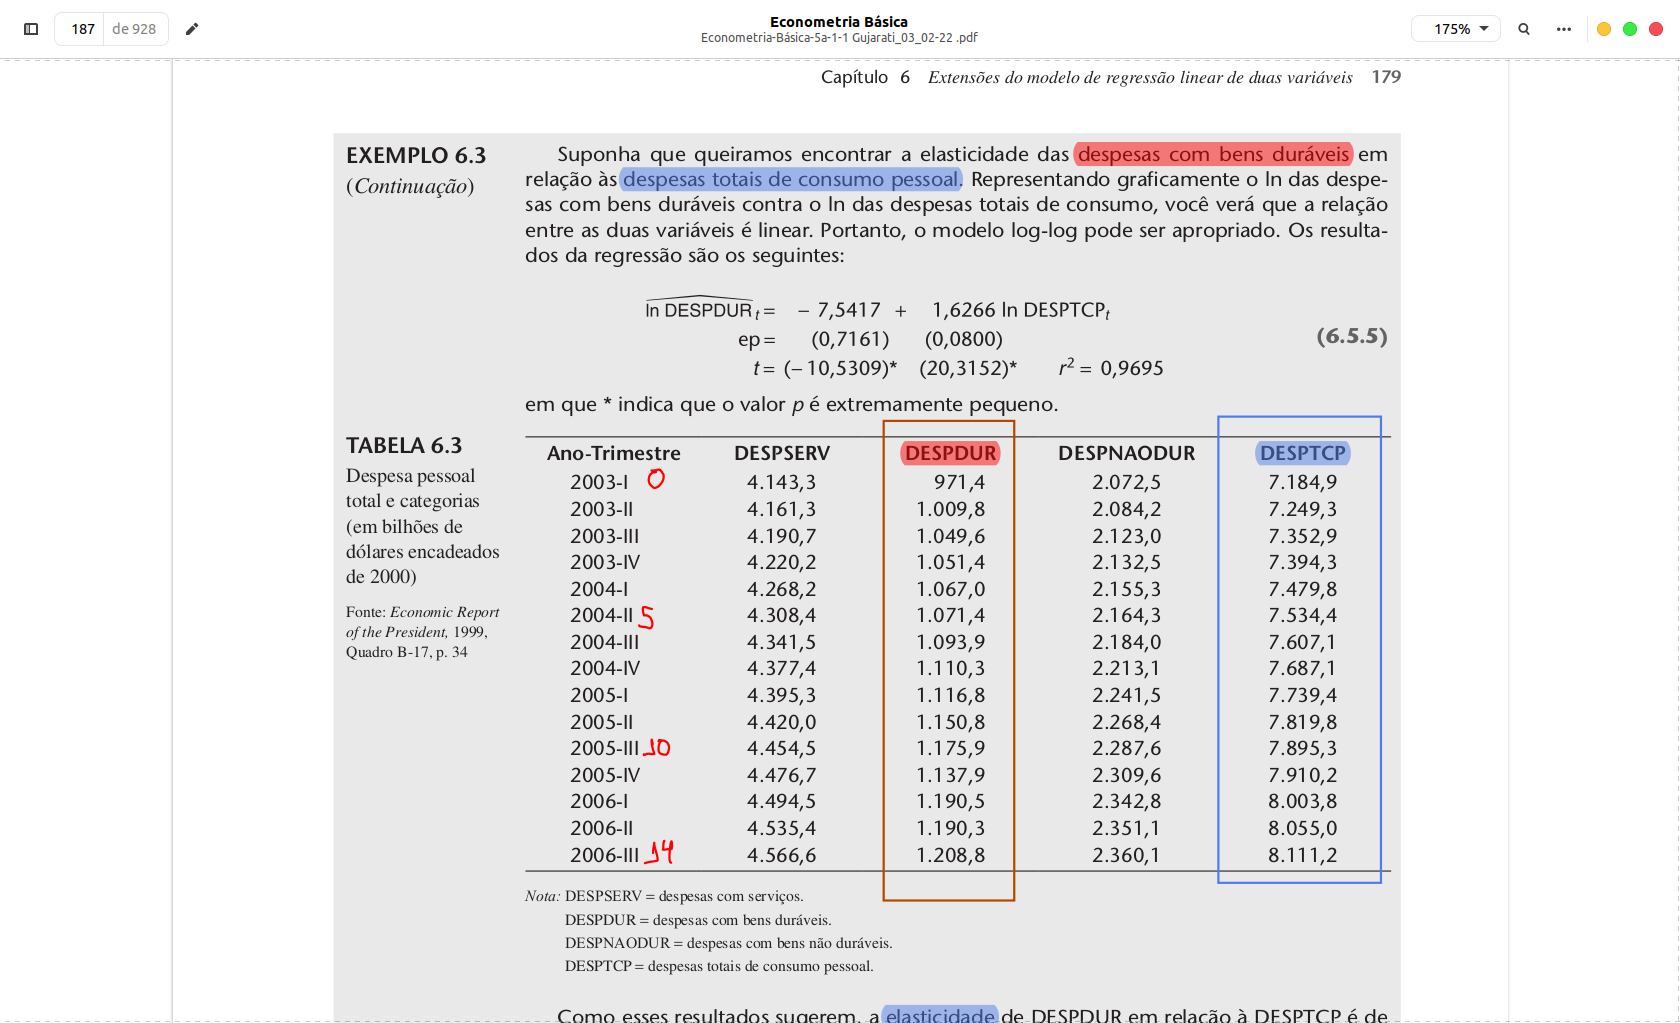

In [32]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.3_1.png')

## Datasets

In [33]:
data = pd.read_excel("/home/deivison/Documentos/projetos/econometria/datasets/cap06_TAB_6.3.xlsx")
data = pd.DataFrame(data)

In [34]:
# Dataset
data

,Ano-Trimestre,DESPSERV,DESPDUR,DESPNAODUR,DESPTCP
0,2003-I,4143.3,971.4,2072.5,7184.9
1,2003-II,4161.3,1009.8,2084.2,7249.3
2,2003-III,4190.7,1049.6,2123.0,7352.9
3,2003-IV,4220.2,1051.4,2132.5,7394.3
4,2004-I,4268.2,1067.0,2155.3,7479.8
5,2004-II,4308.4,1071.4,2164.3,7534.4
6,2004-III,4341.5,1093.9,2184.0,7607.1
7,2004-IV,4377.4,1110.3,2213.1,7687.1
8,2005-I,4395.3,1116.8,2241.5,7739.4
9,2005-II,4420.0,1150.8,2268.4,7819.8


In [35]:
# dataset Log-Log
data_log_log = data.copy()
data_log_log['DESPDUR'] = np.log( data_log_log['DESPDUR'])
data_log_log['DESPTCP'] = np.log( data_log_log['DESPTCP'])
data_log_log

,Ano-Trimestre,DESPSERV,DESPDUR,DESPNAODUR,DESPTCP
0,2003-I,4143.3,6.878738,2072.5,8.879737
1,2003-II,4161.3,6.917508,2084.2,8.888660
2,2003-III,4190.7,6.956164,2123.0,8.902850
3,2003-IV,4220.2,6.957878,2132.5,8.908465
4,2004-I,4268.2,6.972606,2155.3,8.919961
5,2004-II,4308.4,6.976721,2164.3,8.927234
6,2004-III,4341.5,6.997505,2184.0,8.936837
7,2004-IV,4377.4,7.012386,2213.1,8.947299
8,2005-I,4395.3,7.018223,2241.5,8.954079
9,2005-II,4420.0,7.048213,2268.4,8.964414


## Gráficos Modelo Sem transformação  x Modelo Log-log

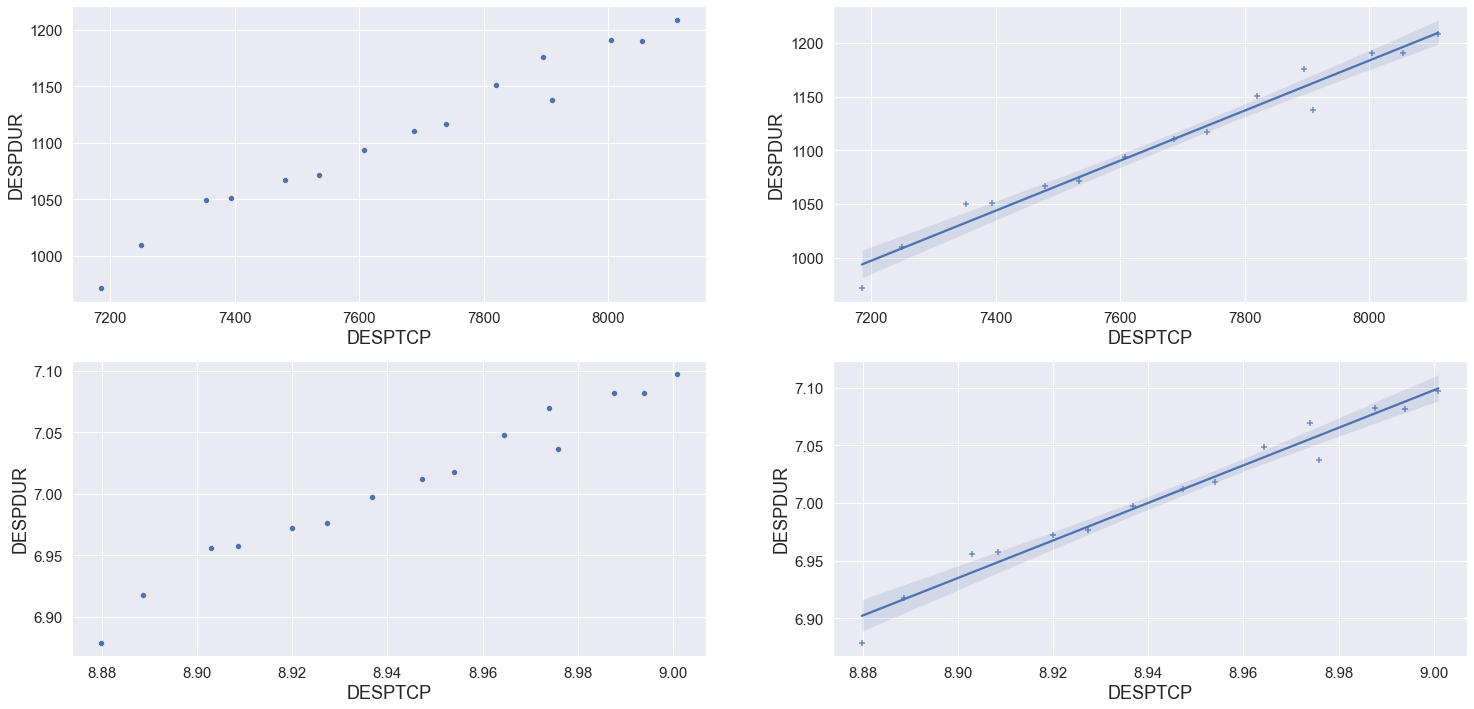

In [36]:
fig = plt.figure( figsize = (25,25))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

#modelo sem transformacao
sns.scatterplot( x = 'DESPTCP', y = 'DESPDUR', data = data, ax = ax1);

sns.regplot( x = 'DESPTCP', y = 'DESPDUR', data = data, fit_reg = True, marker = '+', ax = ax2);

#modelo log-log
sns.scatterplot( x = 'DESPTCP', y = 'DESPDUR', data = data_log_log, ax = ax3);

sns.regplot( x = 'DESPTCP', y = 'DESPDUR', data = data_log_log, fit_reg = True, marker = '+', ax = ax4);


## Coeficientes e Interceptos

In [37]:
#Scikit Learn
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

print('\nModelo sem transformação')
print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

x_log = data_log_log.iloc[:,4].values.reshape(-1,1)
y_log = data_log_log.iloc[:,2].values.reshape(-1,1)
lr_log = LinearRegression()
lr_log.fit(x_log,y_log)
y_pred_log = lr_log.predict(x)

print('\n\nModelo Log-Log')
print("Coeficiente:    ", lr_log.coef_[0])
print("Intercepto:", lr_log.intercept_)
print("R2:", lr_log.score(x_log, y_log) )
print("R2 ajustado:" ,1 - (1-lr_log.score(x_log, y_log))*(len(y_log)-1)/(len(y_log)-x_log.shape[1]-1) )



Modelo sem transformação
Coeficiente:     [0.2331383]
Intercepto: [-681.38773584]
R2: 0.971333709051666
R2 ajustado: 0.969128609747948


Modelo Log-Log
Coeficiente:     [1.62660589]
Intercepto: [-7.54165767]
R2: 0.9694626735850131
R2 ajustado: 0.967113648476168


## Erros Padrões

In [38]:
#Modelo sem transformação
print('Modelo sem Transformação')
x = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Modelo sem Transformação
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     440.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.07e-11
Time:                        08:45:11   Log-Likelihood:                -57.925
No. Observations:                  15   AIC:                             119.9
Df Residuals:                      13   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -681.3877     8

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
#Modelo Log-Log
print('Modelo Log-Log')
x = data_log_log.iloc[:,4].values.reshape(-1,1)
y = data_log_log.iloc[:,2].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Modelo Log-Log
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     412.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.12e-11
Time:                        08:45:11   Log-Likelihood:                 46.577
No. Observations:                  15   AIC:                            -89.15
Df Residuals:                      13   BIC:                            -87.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5417      0.716    -

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
# Regressão LOG-LOG

# ln y = -7.54173 + 1.6266 ln x

#   4. No modelo log-log tanto o regressando quanto o(s) regressor(es) são expressos em forma logarítmica. 

#   O coeficiente de regressão correspondente ao logaritmo de um regressor é interpretado como a elasticidade do regressando em relação ao regressor.

#   Relação y % = beta% x

# Despesas totais (x) aumentar 1% --> Despesas com bens duraveis (y) aumenta 1.63 % 


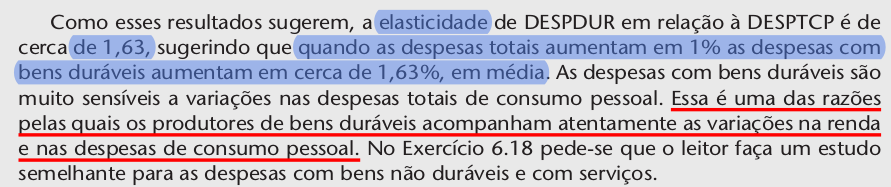

In [41]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.3_3.png' )

# Exemplo 6.4 Modelo Log-Lin

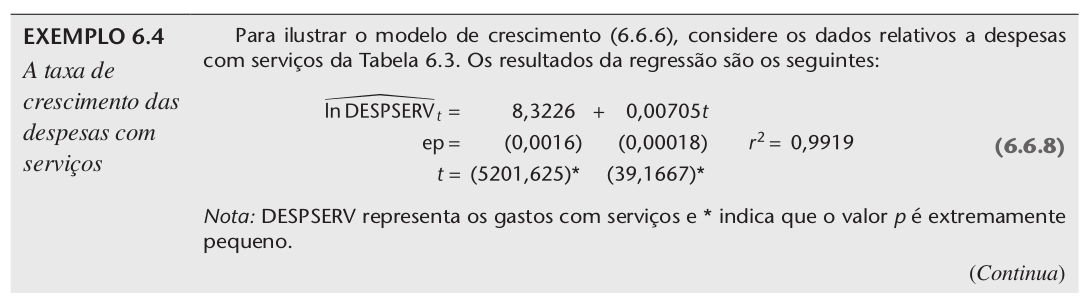

In [42]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.4_1.png')

In [43]:
data = pd.read_excel("/home/deivison/Documentos/projetos/econometria/datasets/cap06_TAB_6.3.xlsx")
data = pd.DataFrame(data)
data

,Ano-Trimestre,DESPSERV,DESPDUR,DESPNAODUR,DESPTCP
0,2003-I,4143.3,971.4,2072.5,7184.9
1,2003-II,4161.3,1009.8,2084.2,7249.3
2,2003-III,4190.7,1049.6,2123.0,7352.9
3,2003-IV,4220.2,1051.4,2132.5,7394.3
4,2004-I,4268.2,1067.0,2155.3,7479.8
5,2004-II,4308.4,1071.4,2164.3,7534.4
6,2004-III,4341.5,1093.9,2184.0,7607.1
7,2004-IV,4377.4,1110.3,2213.1,7687.1
8,2005-I,4395.3,1116.8,2241.5,7739.4
9,2005-II,4420.0,1150.8,2268.4,7819.8


In [44]:
data['t'] = list( np.arange(0,15,1) )

In [45]:
data

,Ano-Trimestre,DESPSERV,DESPDUR,DESPNAODUR,DESPTCP,t
0,2003-I,4143.3,971.4,2072.5,7184.9,0
1,2003-II,4161.3,1009.8,2084.2,7249.3,1
2,2003-III,4190.7,1049.6,2123.0,7352.9,2
3,2003-IV,4220.2,1051.4,2132.5,7394.3,3
4,2004-I,4268.2,1067.0,2155.3,7479.8,4
5,2004-II,4308.4,1071.4,2164.3,7534.4,5
6,2004-III,4341.5,1093.9,2184.0,7607.1,6
7,2004-IV,4377.4,1110.3,2213.1,7687.1,7
8,2005-I,4395.3,1116.8,2241.5,7739.4,8
9,2005-II,4420.0,1150.8,2268.4,7819.8,9


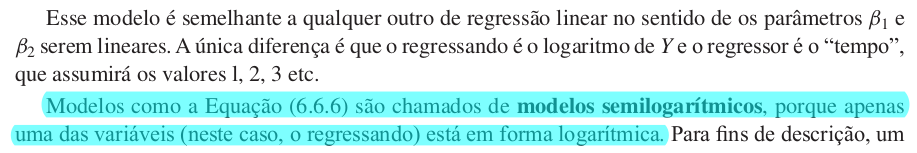

In [46]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.4_2.png')

In [47]:
data_log_lin = data.copy()
data_log_lin['DESPSERV'] = np.log1p( data_log_lin['DESPSERV'])
data_log_lin

,Ano-Trimestre,DESPSERV,DESPDUR,DESPNAODUR,DESPTCP,t
0,2003-I,8.329489,971.4,2072.5,7184.9,0
1,2003-II,8.333823,1009.8,2084.2,7249.3,1
2,2003-III,8.340862,1049.6,2123.0,7352.9,2
3,2003-IV,8.347875,1051.4,2132.5,7394.3,3
4,2004-I,8.359182,1067.0,2155.3,7479.8,4
5,2004-II,8.368554,1071.4,2164.3,7534.4,5
6,2004-III,8.376205,1093.9,2184.0,7607.1,6
7,2004-IV,8.384439,1110.3,2213.1,7687.1,7
8,2005-I,8.388519,1116.8,2241.5,7739.4,8
9,2005-II,8.394121,1150.8,2268.4,7819.8,9


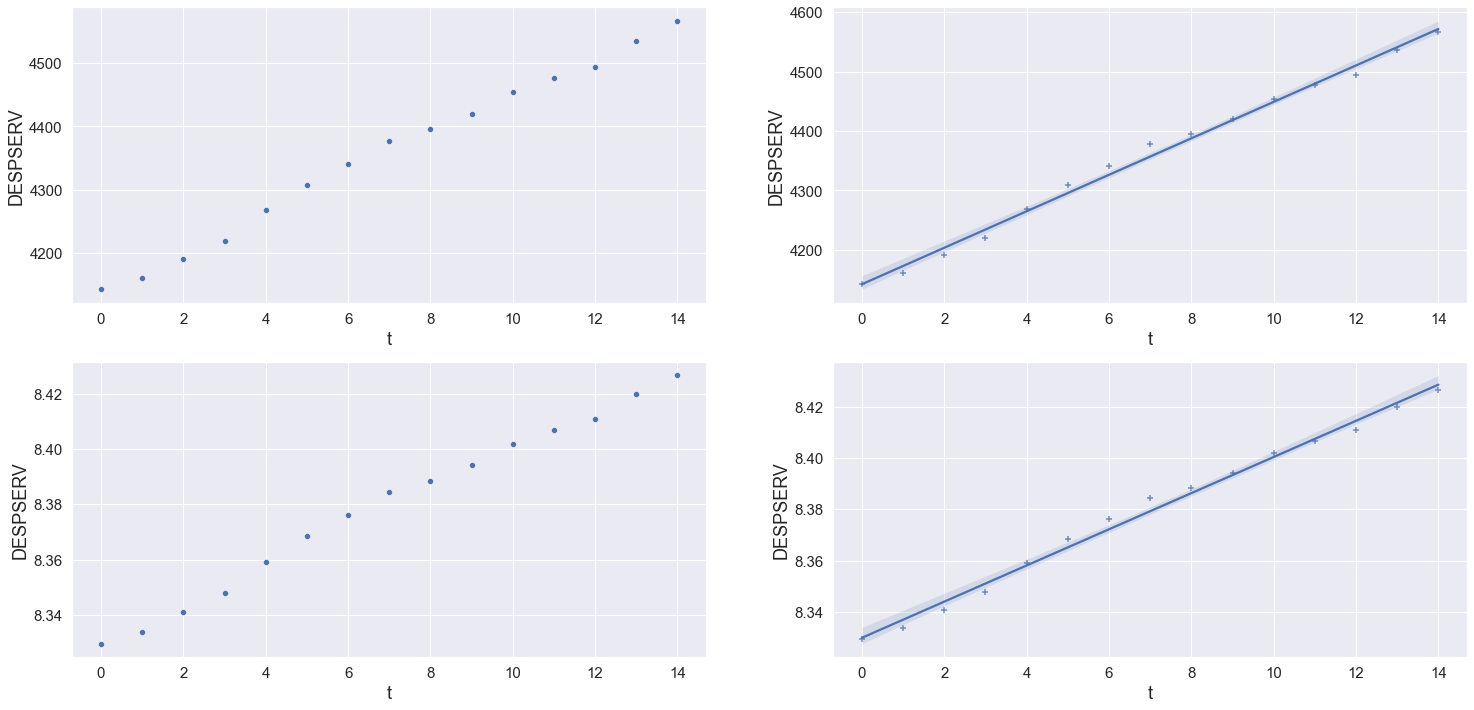

In [48]:
fig = plt.figure( figsize = (25,25))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 't', y = 'DESPSERV', data = data, ax = ax1);

sns.regplot( x = 't', y = 'DESPSERV', data = data, fit_reg = True, marker = '+', ax = ax2);

sns.scatterplot( x = 't', y = 'DESPSERV', data = data_log_lin, ax = ax3);

sns.regplot( x = 't', y = 'DESPSERV', data = data_log_lin, fit_reg = True, marker = '+', ax = ax4);

## Coeficientes e Interceptos

In [49]:
#Modelo Log-Lin
x = data_log_lin.iloc[:,5].values.reshape(-1,1)
y = data_log_lin.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

# plt.scatter(x,y);
# plt.plot(x,y_pred, color = 'red');
# plt.xlabel( r't', fontsize = 20 )
# plt.ylabel(r'Log Serviços', fontsize = 20 )
# plt.show();

print('\nModelo Log-Lin')
print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )


Modelo Log-Lin
Coeficiente:     [0.00705204]
Intercepto: [8.32992182]
R2: 0.9919267786165241
R2 ajustado: 0.991305761587026


In [50]:
#Modelo Sem Transformação
x = data.iloc[:,5].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

# plt.scatter(x,y);
# plt.plot(x,y_pred, color = 'red');
# plt.xlabel( r't', fontsize = 20 )
# plt.ylabel(r'Log Serviços', fontsize = 20 )
# plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

Coeficiente:     [30.67357143]
Intercepto: [4142.21833333]
R2: 0.9934683985535866
R2 ajustado: 0.9929659676730933


## Erros Padrões

### Modelo Log-Lin

In [51]:
#statsmodels
print('\nModelo Log-Lin')
x = data_log_lin.iloc[:,5].values.reshape(-1,1)
y = data_log_lin.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


Modelo Log-Lin
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.42e-15
Time:                        08:45:13   Log-Likelihood:                 67.165
No. Observations:                  15   AIC:                            -130.3
Df Residuals:                      13   BIC:                            -128.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3299      0.001   5

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


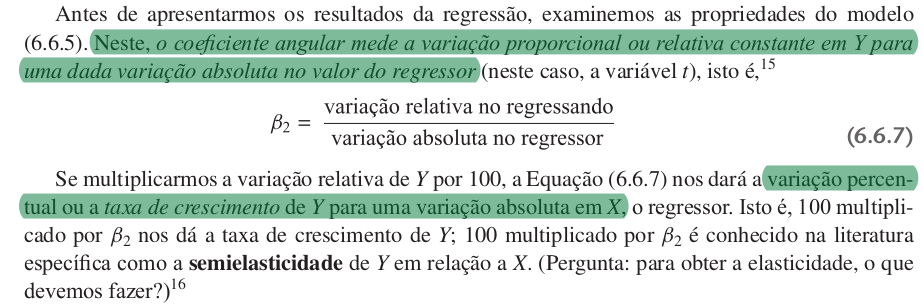

In [52]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.4_4.png')

In [53]:
# Regressão LOG-LIN

# ln y = 8.32992182 + 0,00705 t

#   No modelo log-linear o regressando esta expresso em forma logarítmica e os regressores em forma linear. 

#   O coeficiente de regressão correspondente ao regressor é interpretado como a semielasticidade do regressando em relação ao regressor.

#   Relação y % = beta t 

## Modelo sem Transformação - Modelo de tendência

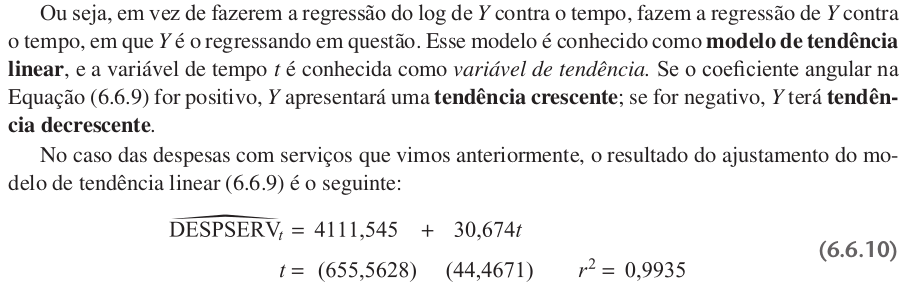

In [54]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.4_5.png')

In [55]:
#statsmodels
print('\nModelo sem transformação')
x = data.iloc[:,5].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


Modelo sem transformação
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1977.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.37e-15
Time:                        08:45:14   Log-Likelihood:                -56.902
No. Observations:                  15   AIC:                             117.8
Df Residuals:                      13   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4142.2183     

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
# Regressão LOG-LIN

# ln y = 8.32992182 + 0,00705 t

#   4. No modelo log-linear tanto o regressando quanto o(s) regressor(es) são expressos em forma logarítmica. 

#   O coeficiente de regressão correspondente ao logaritmo de um regressor é interpretado como a elasticidade do regressando em relação ao regressor.

#   Relação y % = beta t 

# Exemplo 6.5 - Modelo Lin-Log

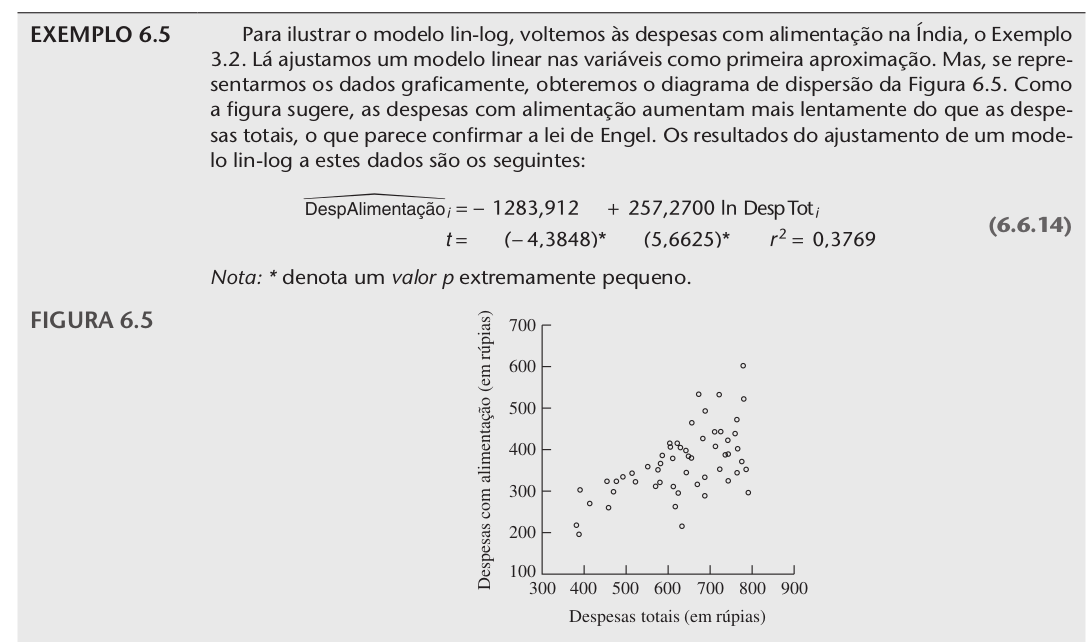

In [57]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.5_1.png')

In [58]:
data = pd.read_csv("/home/deivison/Documentos/projetos/econometria/datasets/cap03_india.csv")
data

,Observacao,despesas_com_alimentacao,despesas_total
0,1,217,382
1,2,196,388
2,3,303,391
3,4,270,415
4,5,325,456
5,6,260,460
6,7,300,472
7,8,325,478
8,9,336,494
9,10,345,516


In [59]:
data_lin_log = data.copy()
data_lin_log['despesas_total'] = np.log( data_lin_log['despesas_total'])
data_lin_log

,Observacao,despesas_com_alimentacao,despesas_total
0,1,217,5.945421
1,2,196,5.961005
2,3,303,5.968708
3,4,270,6.028279
4,5,325,6.122493
5,6,260,6.131226
6,7,300,6.156979
7,8,325,6.169611
8,9,336,6.202536
9,10,345,6.246107


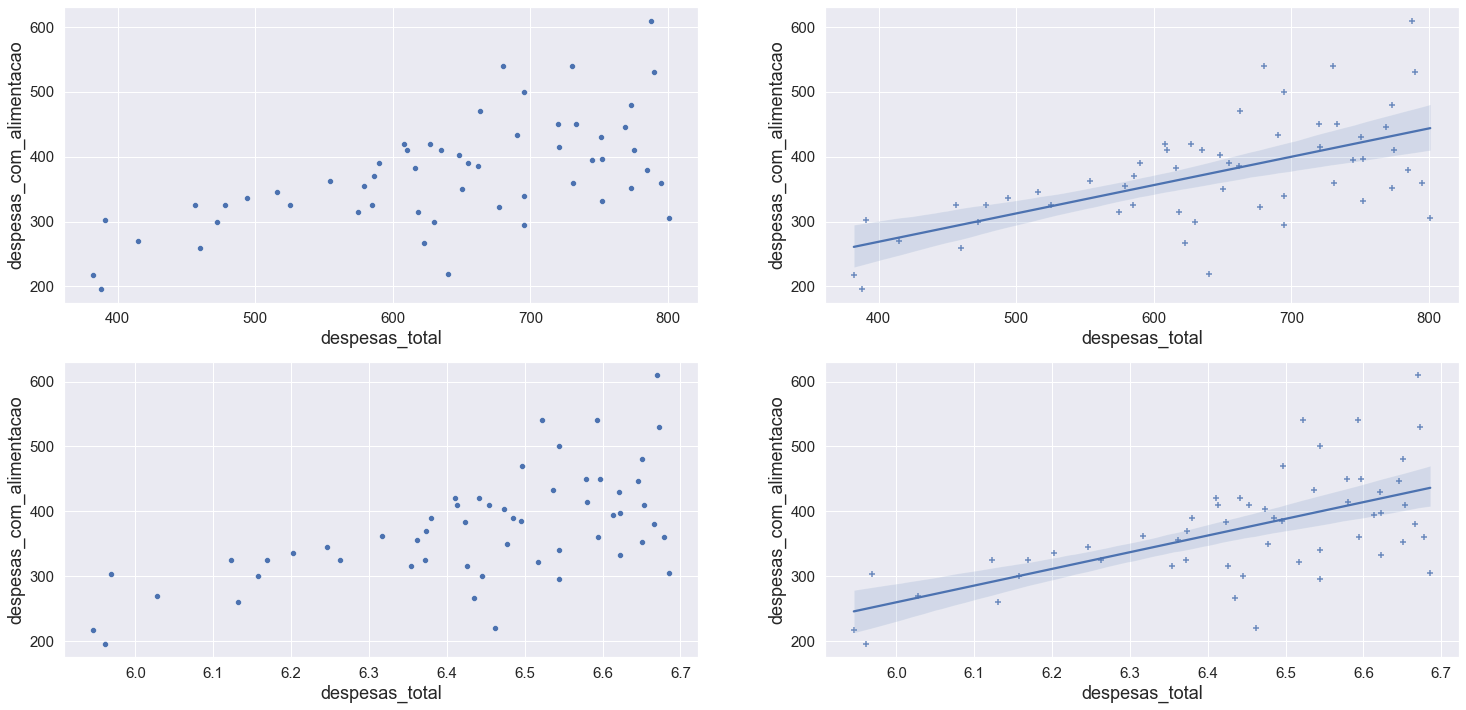

In [60]:
fig = plt.figure( figsize = (25,25))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'despesas_total', y = 'despesas_com_alimentacao', data = data, ax = ax1);

sns.regplot( x = 'despesas_total', y = 'despesas_com_alimentacao', data = data, fit_reg = True, marker = '+', ax = ax2);

sns.scatterplot( x = 'despesas_total', y = 'despesas_com_alimentacao', data = data_lin_log, ax = ax3);

sns.regplot(x = 'despesas_total', y = 'despesas_com_alimentacao', data = data_lin_log, fit_reg = True, marker = '+', ax = ax4);

In [61]:
#Scikit Learn
print('Modelo sem transformação\n')
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

# plt.scatter(x,y);
# plt.plot(x,y_pred, color = 'red');
# plt.xlabel( r'Despesas', fontsize = 20 )
# plt.ylabel(r'Alimentacão', fontsize = 20 )
# plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

Modelo sem transformação

Coeficiente:     [0.43680875]
Intercepto: [94.20877741]
R2: 0.36982373362718657
R2 ajustado: 0.35793361539373725


In [62]:
print('Modelo Lin-Log\n')
x = data_lin_log.iloc[:,2].values.reshape(-1,1)
y = data_lin_log.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

# plt.scatter(x,y);
# plt.plot(x,y_pred, color = 'red');
# plt.xlabel( r'Despesas', fontsize = 20 )
# plt.ylabel(r'Alimentacão', fontsize = 20 )
# plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

Modelo Lin-Log

Coeficiente:     [257.27003012]
Intercepto: [-1283.91204356]
R2: 0.37693766343391255
R2 ajustado: 0.36518177029115617


## Erros Padrões

### Modelo Sem transformação

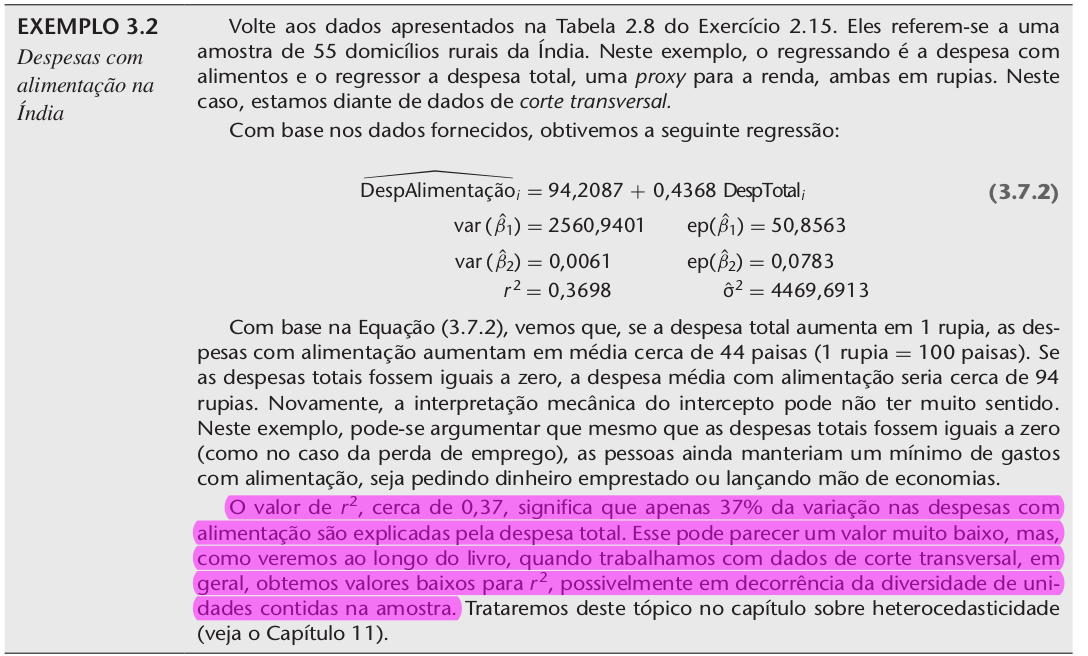

In [63]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.5_2.png')

In [64]:
#statsmodels
print('Modelo sem transformação')
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Modelo sem transformação
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.10
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.45e-07
Time:                        08:45:15   Log-Likelihood:                -308.16
No. Observations:                  55   AIC:                             620.3
Df Residuals:                      53   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2088     5

### Modelo Lin-Log

In [65]:
#statsmodels
print('Modelo Log-Lin')
x = data_log_lin.iloc[:,2].values.reshape(-1,1)
y = data_log_lin.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Modelo Log-Lin
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     238.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           9.58e-10
Time:                        08:45:16   Log-Likelihood:                 53.246
No. Observations:                  15   AIC:                            -102.5
Df Residuals:                      13   BIC:                            -101.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8942      0.031    2

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


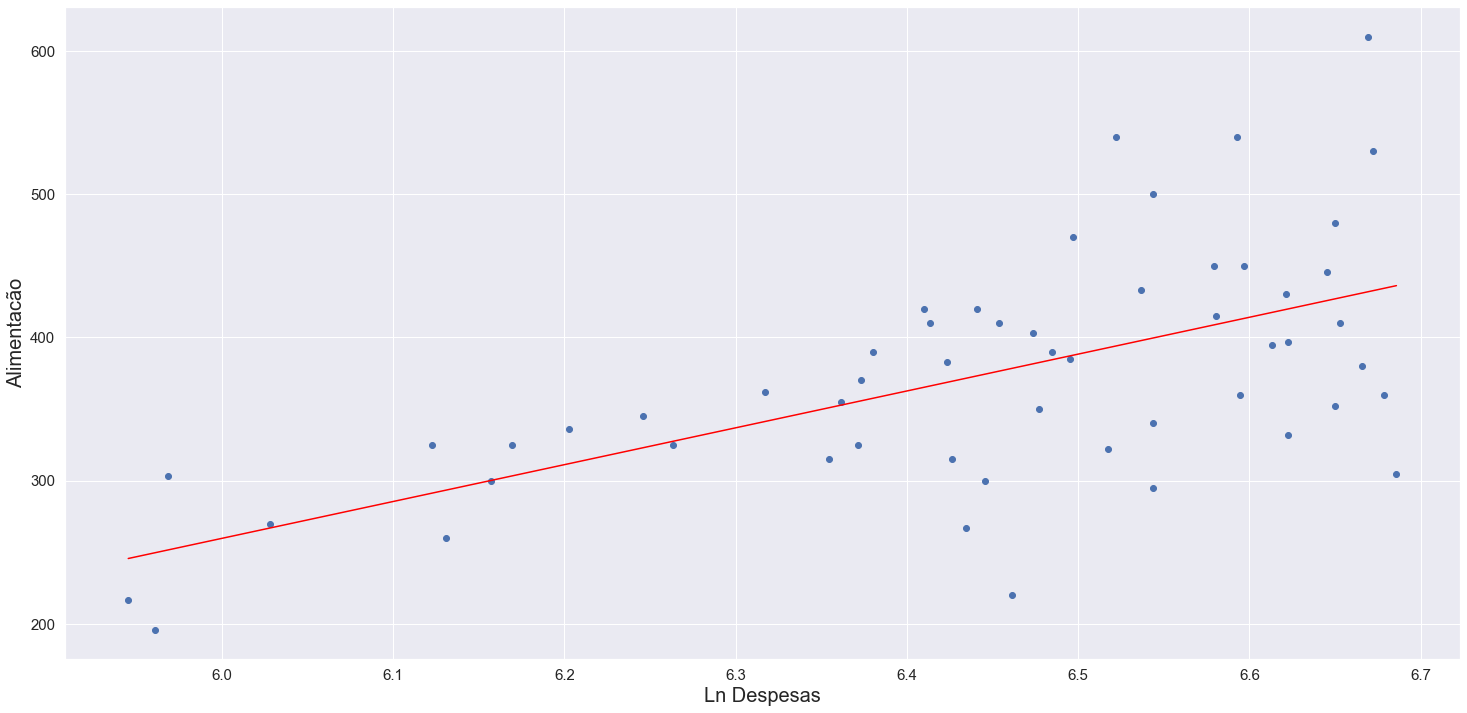

Coeficiente:     [257.27003012]
Intercepto: [-1283.91204356]
R2: 0.37693766343391255
R2 ajustado: 0.36518177029115617


In [66]:
#Scikit Learn
x = data_lin_log.iloc[:,2].values.reshape(-1,1)
y = data_lin_log.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'Ln Despesas', fontsize = 20 )
plt.ylabel(r'Alimentacão', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

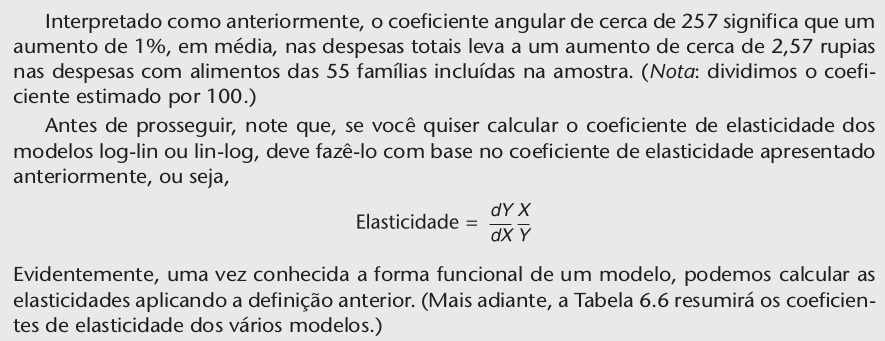

In [67]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.5_3.png')

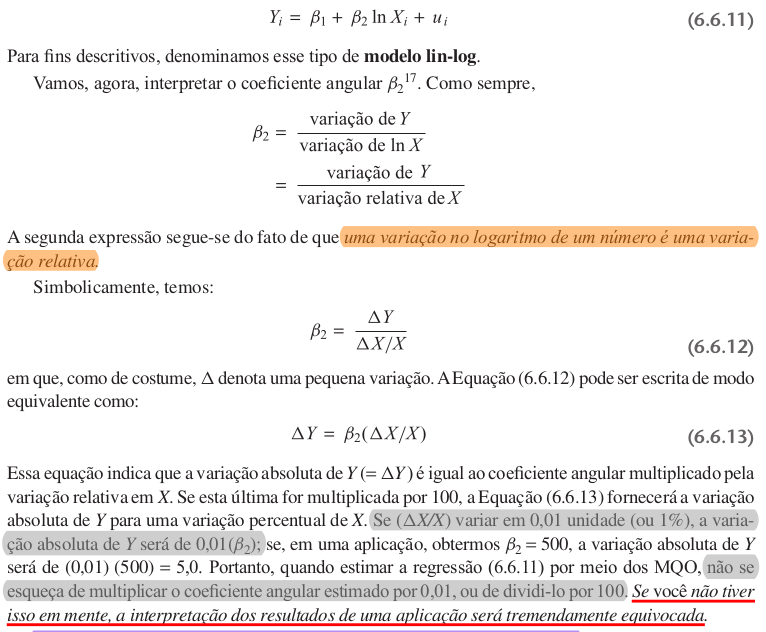

In [68]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.5_4.png')